# Glass Classification (Study)
This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values). Obtained from: https://www.kaggle.com/uciml/glass

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import skew
from scipy.stats import boxcox
import seaborn as sns
sns.set_style('darkgrid')
matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import xgboost as xgb

In [2]:
data = pd.read_csv('glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


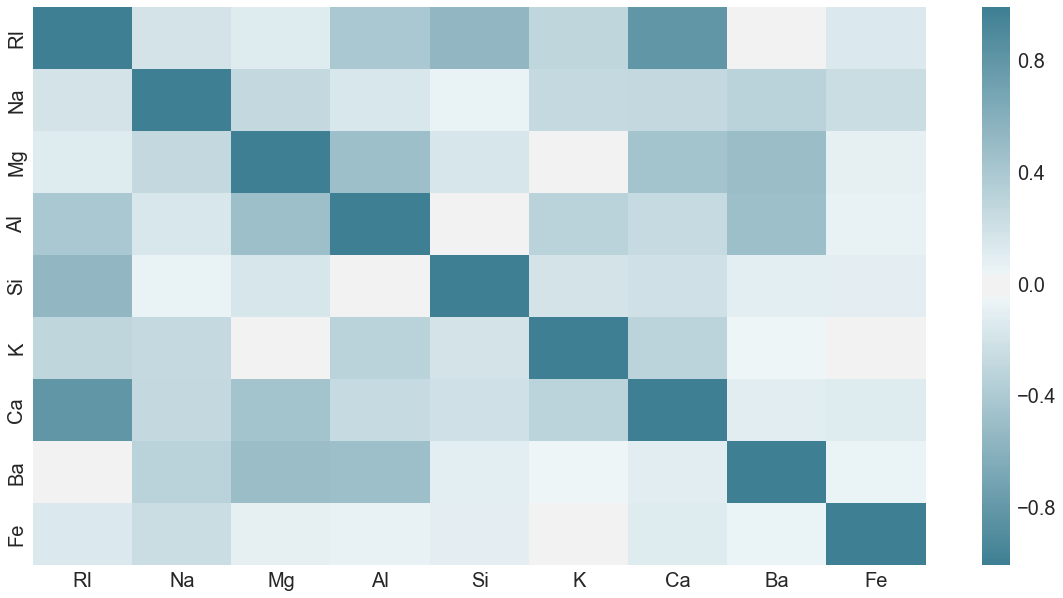

In [3]:
train = data.drop('Type', axis=1)
corr = train.corr()
cmap = sns.diverging_palette(220, 220, as_cmap=True)
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap=cmap)

Looking at how the different attributes may influence the classification. This is to look for possible skewness and fixing it to some extent.

In [5]:
X = data.drop(['Type'], axis=1)
Y = data['Type']
data.corr()['Type'].abs().sort_values(ascending= False)

Type    1.000000
Mg      0.744993
Al      0.598829
Ba      0.575161
Na      0.502898
Fe      0.188278
RI      0.164237
Si      0.151565
K       0.010054
Ca      0.000952
Name: Type, dtype: float64

In [7]:
classes = X.columns.values
X_u = pd.DataFrame()
for c in classes:
    

TypeError: 'numpy.ndarray' object is not callable